In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

there are 0 values in columns 'Insulin", 'BMI', 'SkinThikness', 'BloodPressure'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

The target variable is binary, with a mean of 0.35, indicating about 35% of the individuals have diabetes. 

**Potential Issues:**
Features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have minimum values of 0, which may represent missing or invalid data that needs to be handled (e.g., imputation or removal).

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

the dataset doesn't have null values

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

the dataset does not have nan values 

In [10]:
data.duplicated().sum()

0

In [11]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

A lot of zero values. Let's check the correlation between features to make a decision how to handle this issue
Glucose only 5 zero values 
SkinThickness - 227, however not sure if it is a good predictor for outcome 
insulin - 374, and it could be very important predictor for outcome 
BMI - 11, 
Outcome - 500, means that 500 True Negatives outcomes, in other words healthy.   


In [12]:
dataCopy = data.copy()


In [13]:
# Let's change 0 values with NaN
dataCopy[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] = dataCopy[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].replace(0, np.NaN)
dataCopy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
dataCopy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

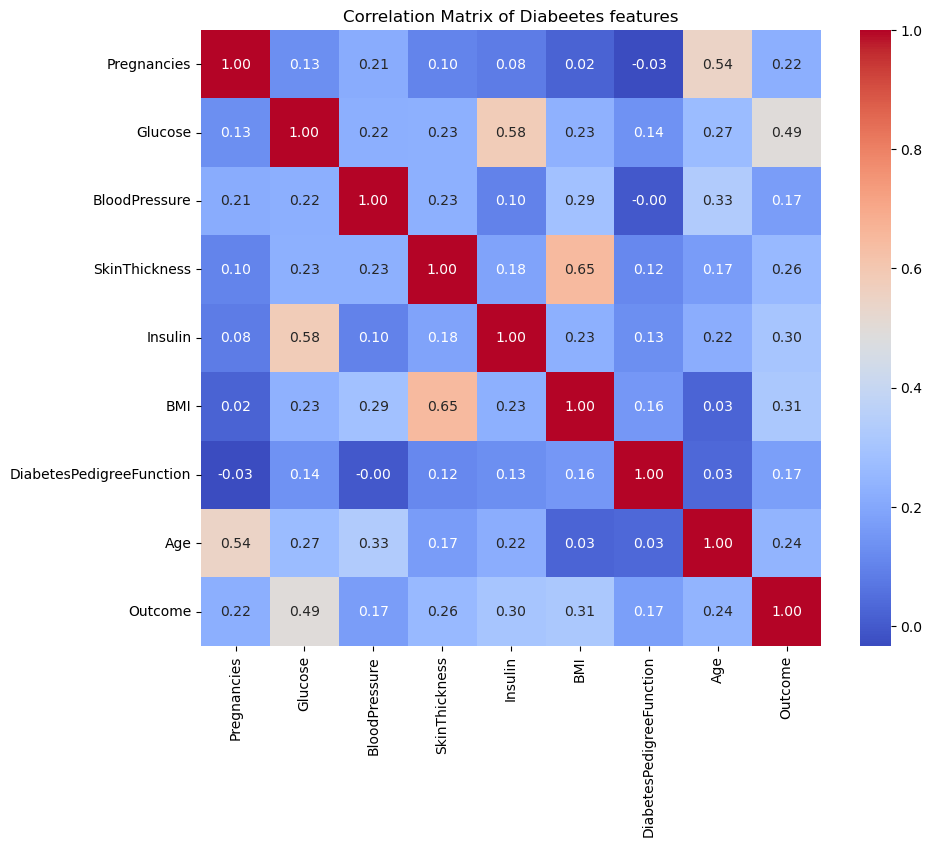

In [15]:
correlations = dataCopy.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabeetes features')
plt.show()

Imputing missing data, we should use the mean if the data has a normal distribution and the median if the data is skewed

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

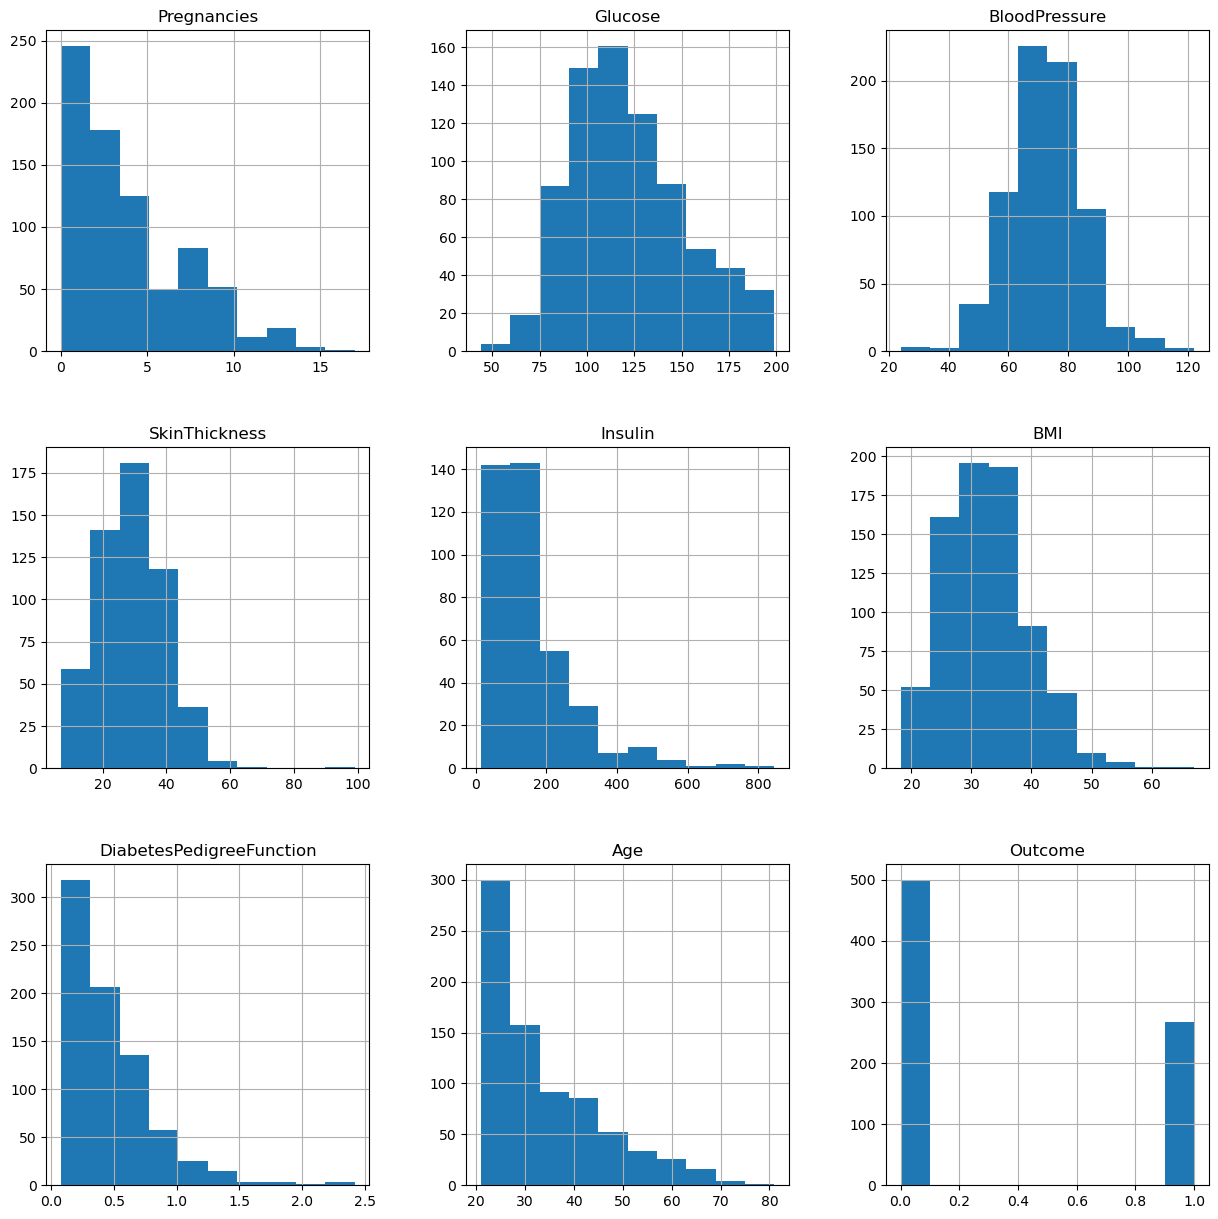

In [16]:
dataCopy.hist(figsize = (15,15))

Normal distribution - Glucose, BloodPresure 
Skewed - SkinThickness, Insulin, BMI 

<Axes: xlabel='DiabetesPedigreeFunction'>

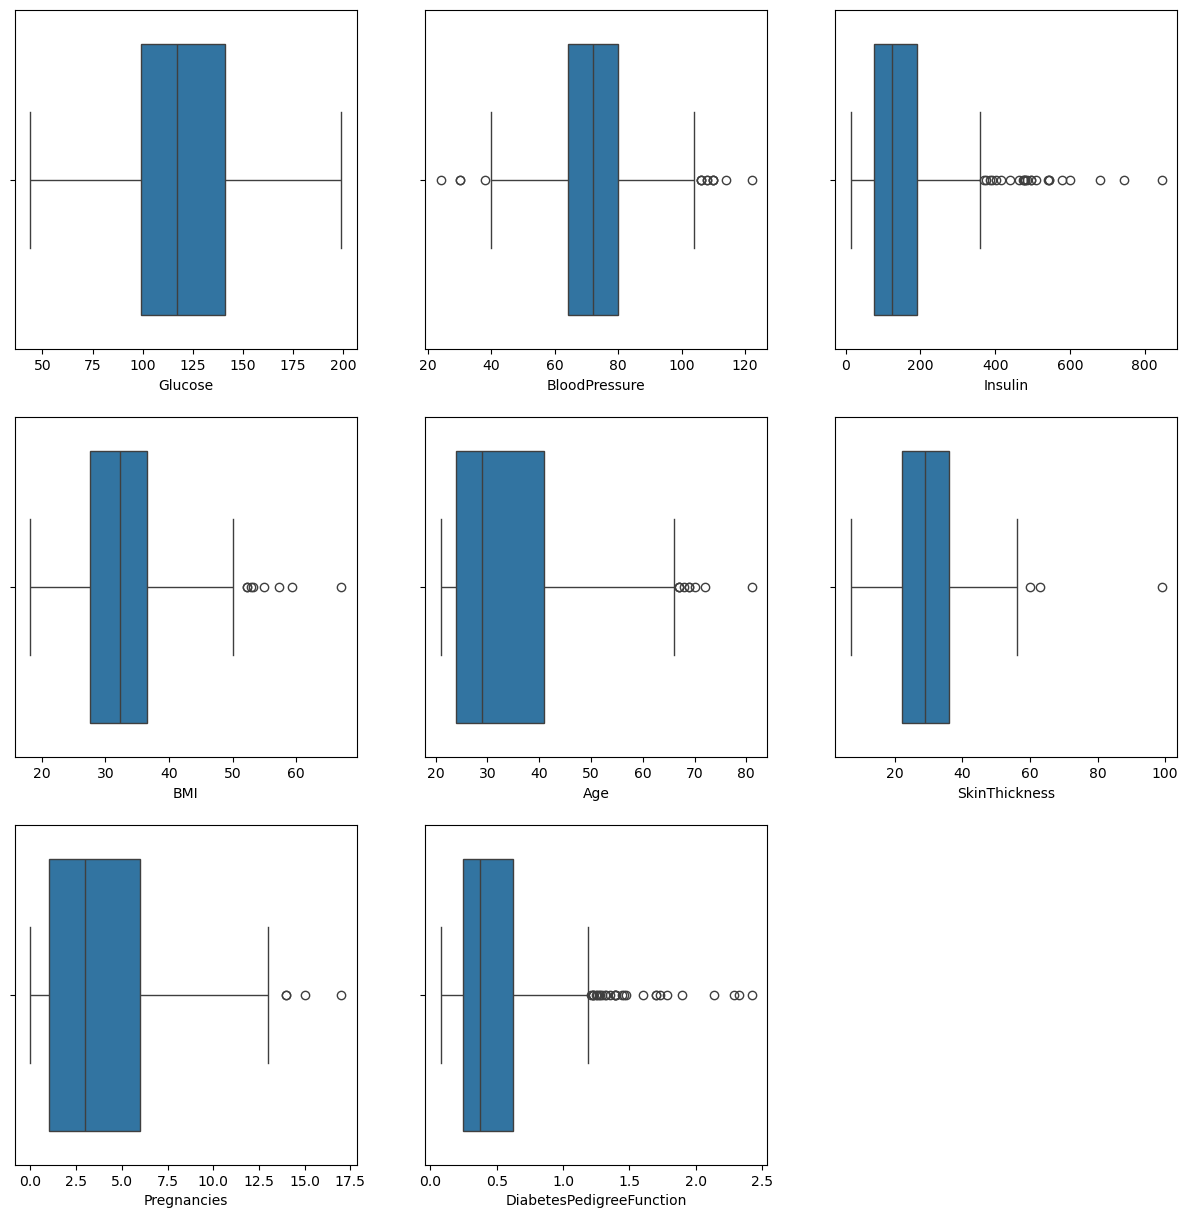

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=dataCopy)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=dataCopy)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=dataCopy)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=dataCopy)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=dataCopy)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=dataCopy)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=dataCopy)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=dataCopy)

In [18]:
# Imputing NaN values in features(columns) according their distribution
dataCopy['Glucose'].fillna(dataCopy['Glucose'].mean(), inplace=True)
dataCopy['BloodPressure'].fillna(dataCopy['BloodPressure'].mean(), inplace=True)
dataCopy['SkinThickness'].fillna(dataCopy['SkinThickness'].median(), inplace=True)
dataCopy['BMI'].fillna(dataCopy['BMI'].median(), inplace=True)
dataCopy['Insulin'].fillna(dataCopy['Insulin'].median(), inplace=True)

In [19]:
dataCopy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [20]:
dataCopy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
dataCopy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Data Visualisation

Countplot - to understand whether data balanced or not
Box Plot - to analise the distribution and see the outliers


/var/folders/gy/h5y3_kbs6szbnr0bc8mnr2qc0000gn/T/ipykernel_12917/441773180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=dataCopy, palette="Set2")


<Axes: xlabel='Outcome', ylabel='count'>

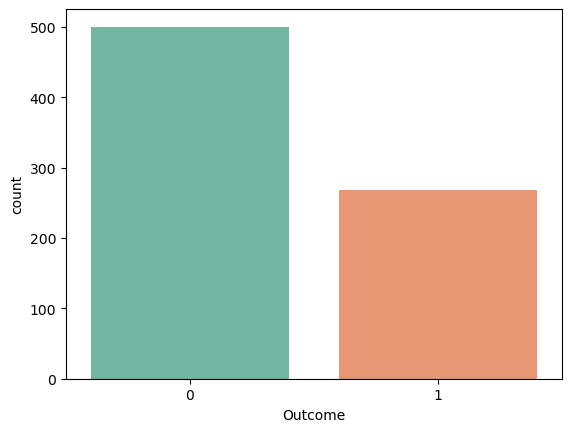

In [22]:
# Countplot 
sns.countplot(x='Outcome', data=dataCopy, palette="Set2")

People without diabetes are far more than people with the desease.
This indicates that the data is unbalanced. 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

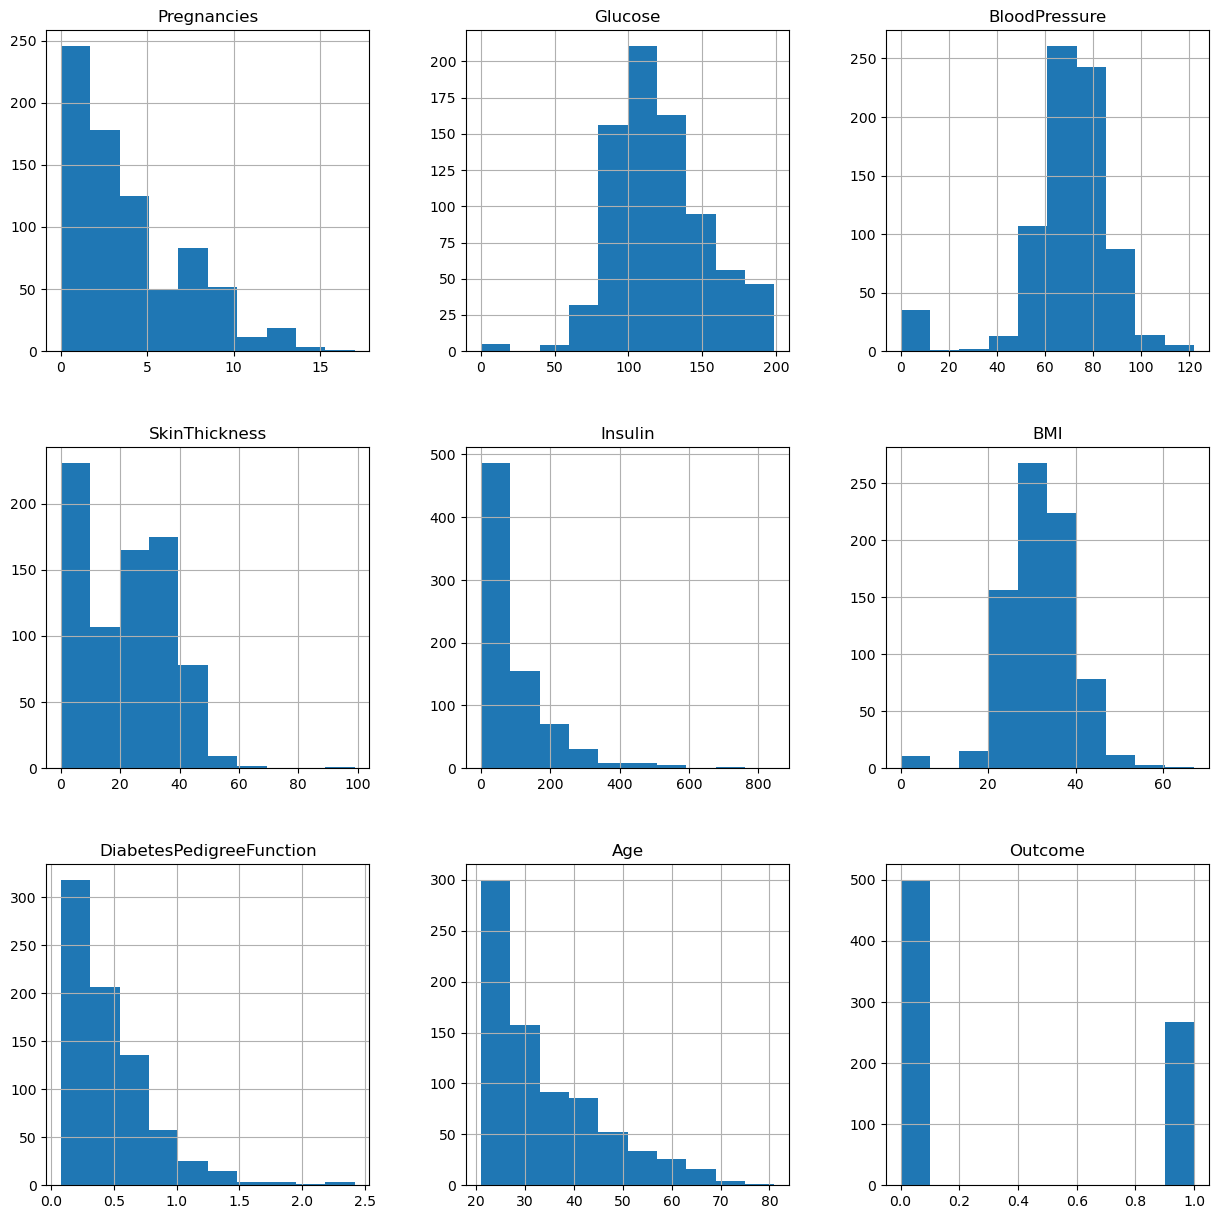

In [23]:
data.hist(figsize = (15,15))

<Axes: xlabel='DiabetesPedigreeFunction'>

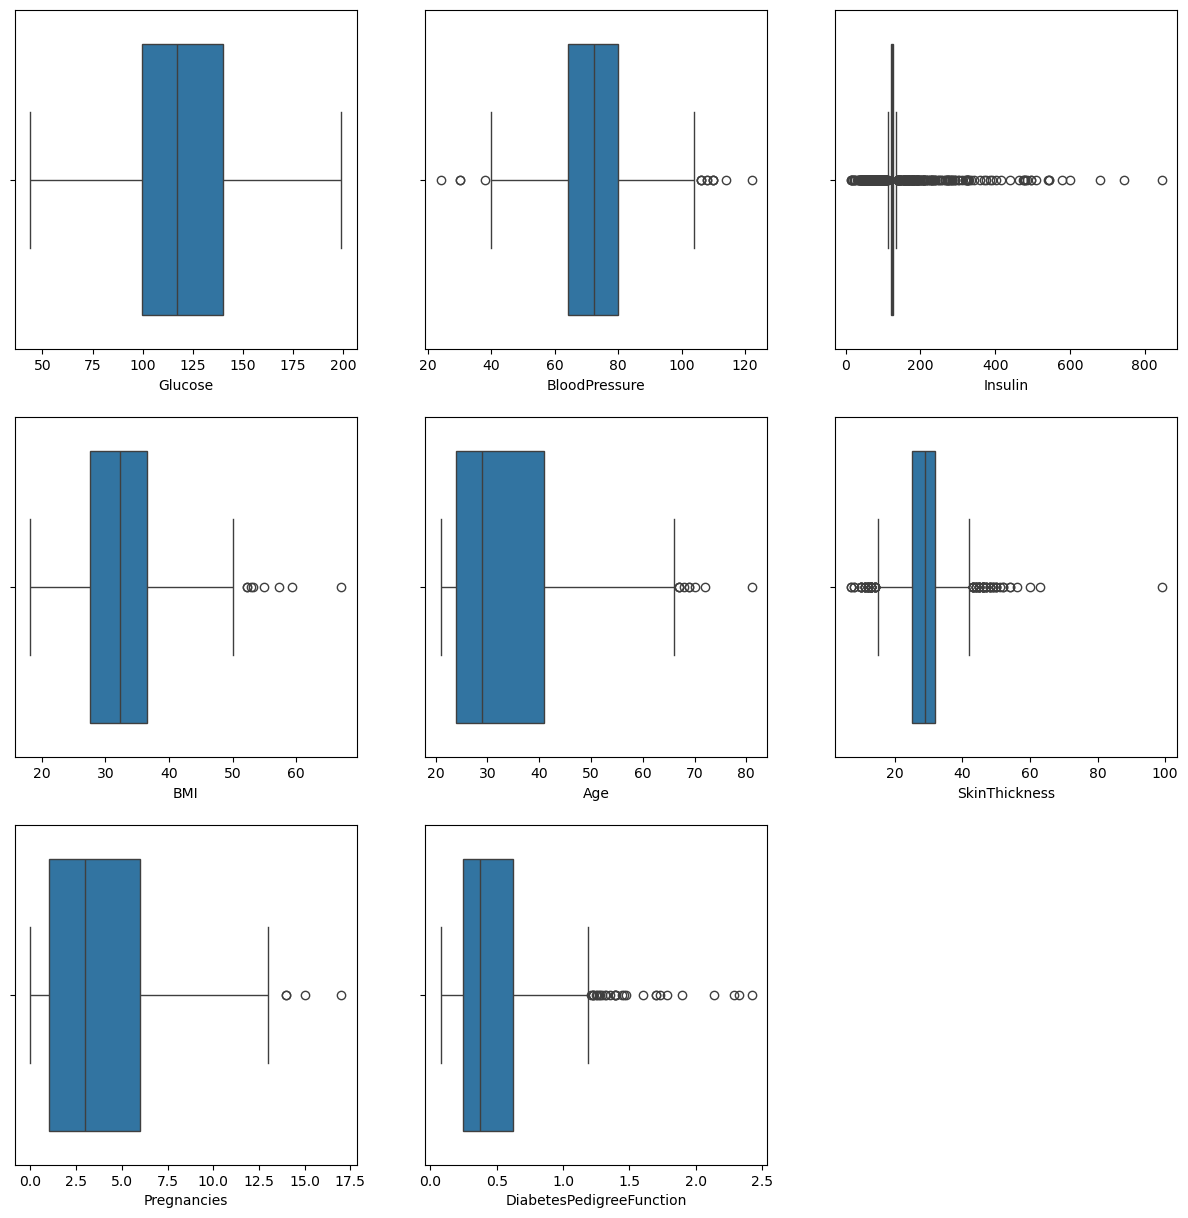

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=dataCopy)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=dataCopy)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=dataCopy)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=dataCopy)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=dataCopy)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=dataCopy)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=dataCopy)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=dataCopy)

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

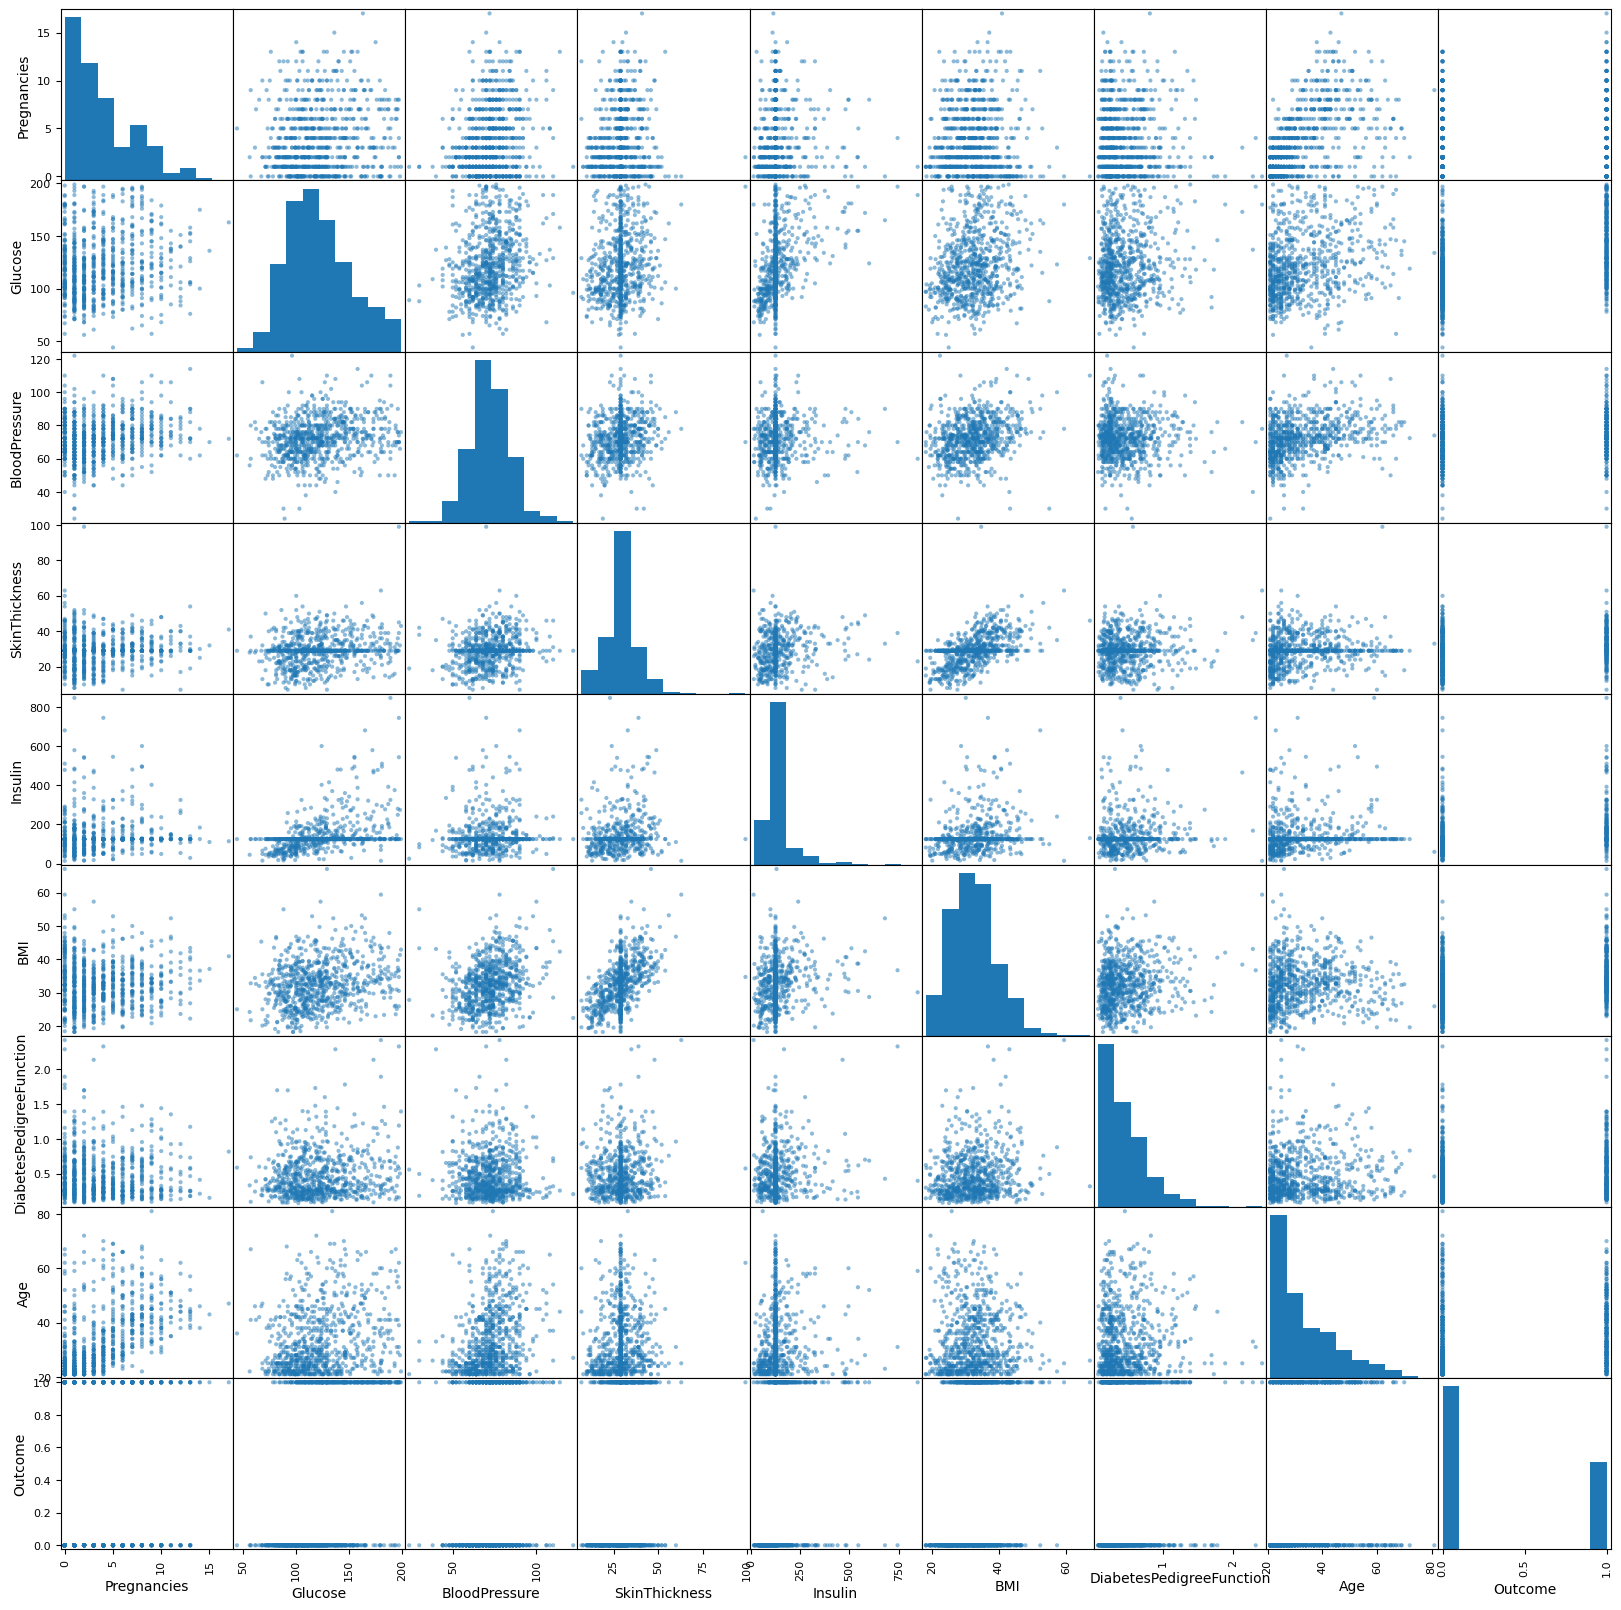

In [25]:
scatter_matrix(dataCopy, figsize=(20,20))

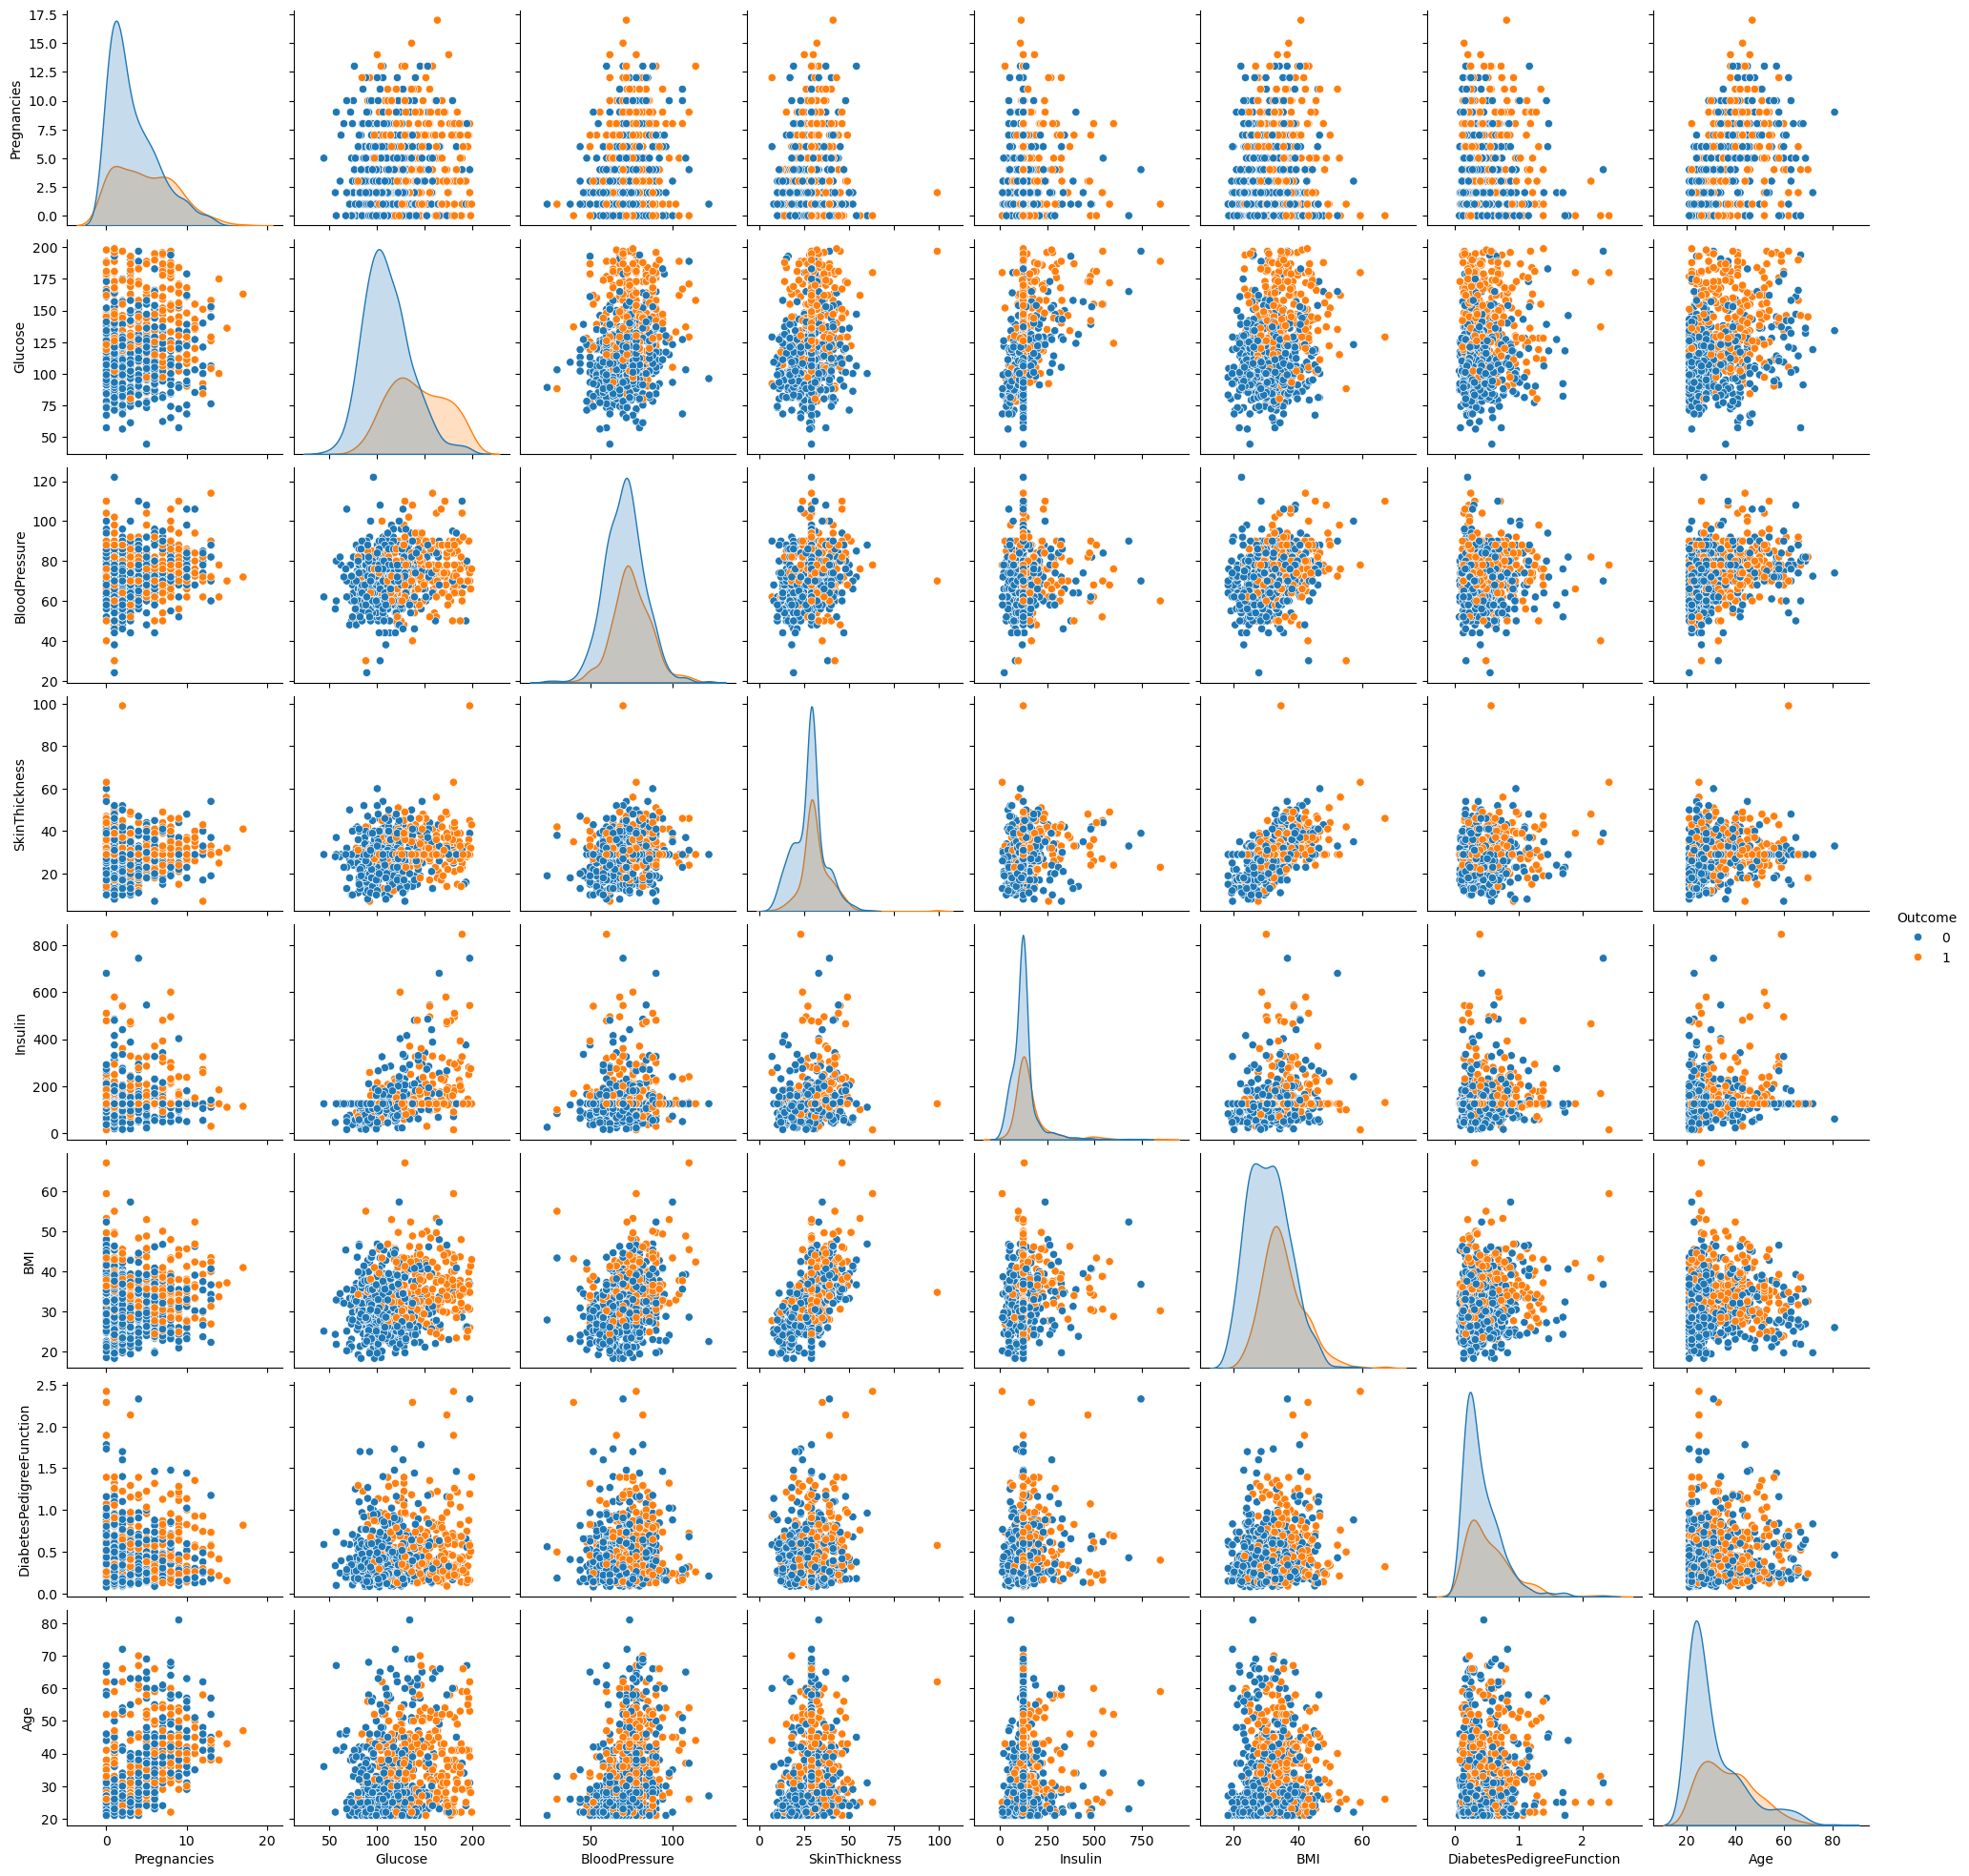

In [26]:
sns.pairplot(dataCopy, hue='Outcome')
plt.show()

# Feature Selection

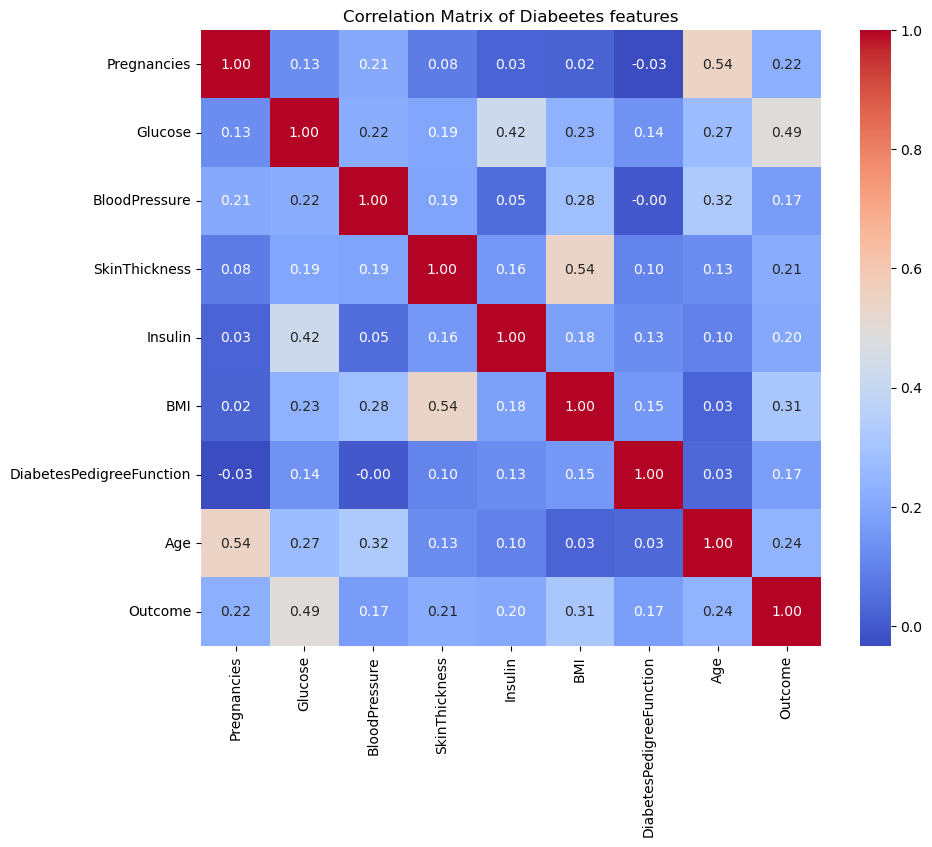

In [27]:
correlations = dataCopy.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabeetes features')
plt.show()

The most correlated with Outcome features are: Glucose, BMI and Age. 
Insulin corelated with Glucose 
Pregnancies correlated with Age 
BloodPressure has low correlation with the Outcome. However it has better correlation with Age and BMI. 
SkinThickness has low correlation with the Outcome. However it has good correlation with BMI.
DiabetesPedegreeFunction bad correlated the Outcome. 
We can drop Pregnancies, BloodPressure, SkinThincknes, Insulin and DiabetesPedigreeFunction

In [28]:
droped_features = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
dataCopy_selected = dataCopy.drop(droped_features, axis='columns')
dataCopy_selected.head()

Glucose   BMI  Age  Outcome
0    148.0  33.6   50        1
1     85.0  26.6   31        0
2    183.0  23.3   32        1
3     89.0  28.1   21        0
4    137.0  43.1   33        1

# Handling Outliers

- Outliers identification 
- Removing Outliers
- Transforming Outliers (Capping)
- Tranforming Outliers using Quantile Transformer

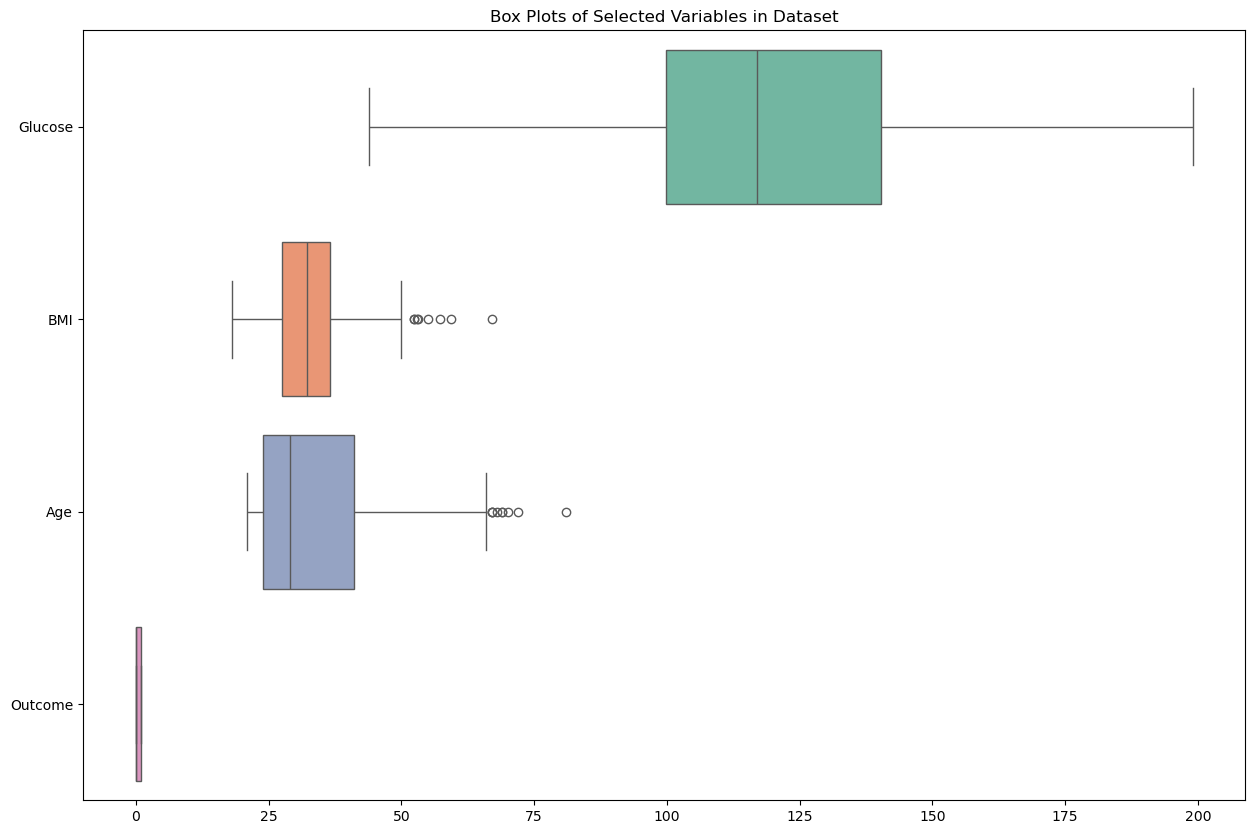

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dataCopy_selected, orient='h', palette='Set2')
plt.title('Box Plots of Selected Variables in Dataset')
plt.show()

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

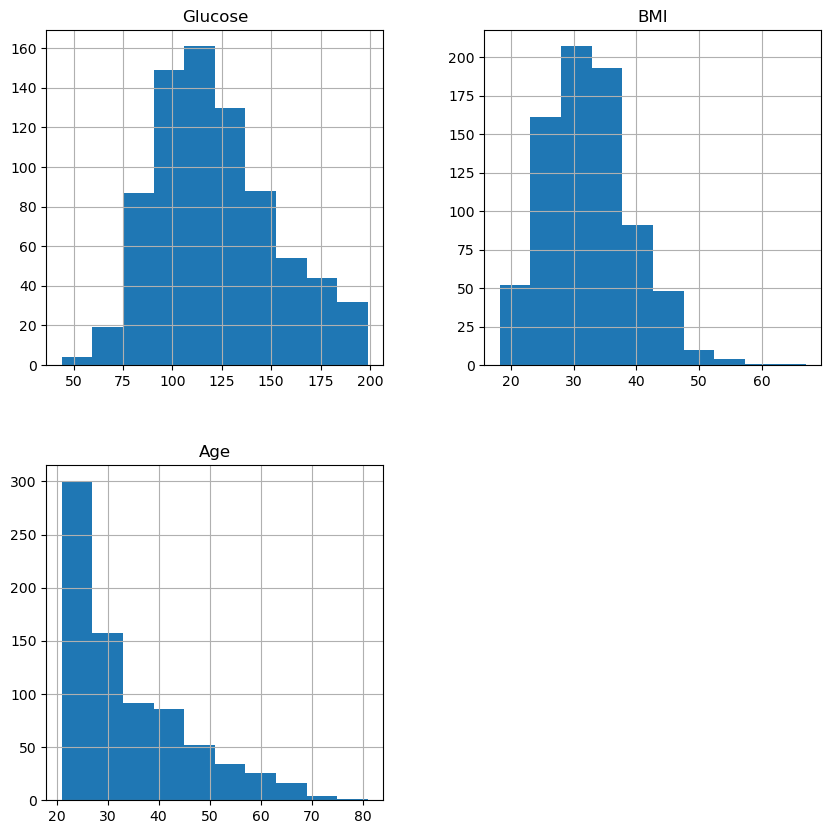

In [30]:
dataCopy_selected.hist(['Glucose', 'BMI', 'Age'], figsize=(10,10))

# Identification using IQR

In [31]:
def find_outliers_iqr(data, column): 

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Combine outliers for all selected columns
outlier_mask = pd.Series(False, index=dataCopy_selected.index)

for column in dataCopy_selected.columns:
    outliers = find_outliers_iqr(data,column)
    print(f"Number of outliers in '{column}': '{outliers.sum()}'")
    outlier_mask = outlier_mask | outliers  # Combine masks using OR

Number of outliers in 'Glucose': '5'
Number of outliers in 'BMI': '19'
Number of outliers in 'Age': '9'
Number of outliers in 'Outcome': '0'


Removing outliers

<Axes: >

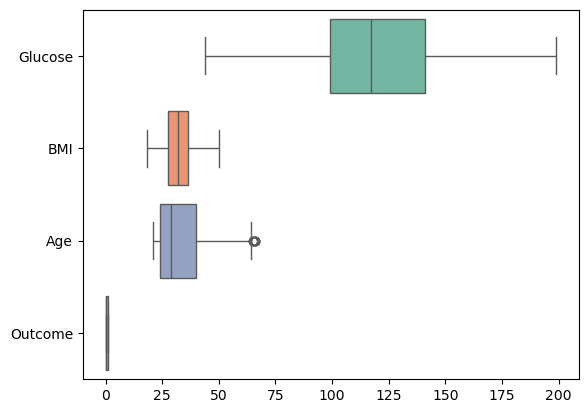

In [32]:
data_no_outliers = dataCopy_selected[~outlier_mask]
data_no_outliers.shape
sns.boxplot(data_no_outliers, orient='h', palette='Set2')

Transforming Outliers (Capping)

<Axes: >

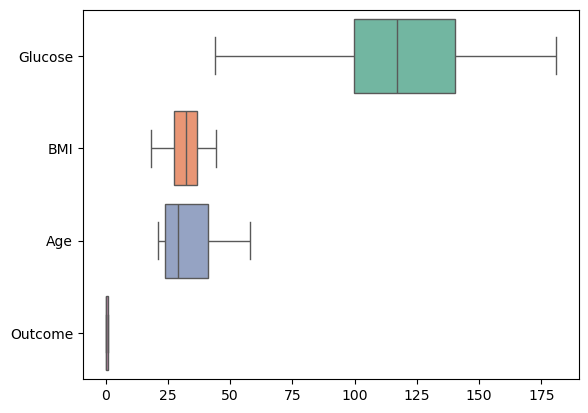

In [ ]:
data_capped = dataCopy_selected.copy()

for column in dataCopy_selected.columns:
    upper_cap = dataCopy_selected[column].quantile(0.95)
    data_capped[column] = np.where(
        data_capped[column] > upper_cap, upper_cap, data_capped[column]
)

sns.boxplot(data_capped, orient='h', palette='Set2')


Transforming Outliers with QuantileTransformer from sklearn

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: >

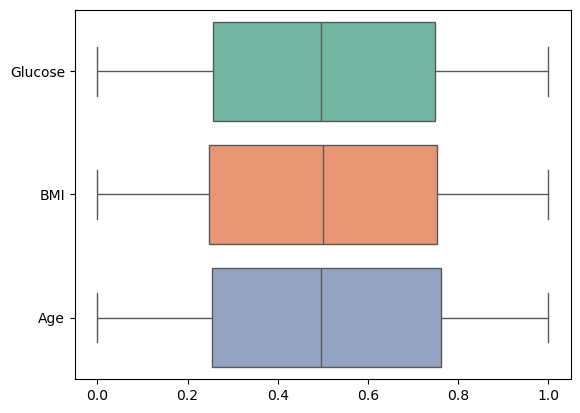

In [34]:
from sklearn.preprocessing import QuantileTransformer

data_transformed = dataCopy_selected.copy()

columns_to_transform = ['Glucose', 'BMI', 'Age']

# Initialize the QuantileTransformer
quantile = QuantileTransformer()
# Apply the transformation to selected columns
data_transformed[columns_to_transform] = quantile.fit_transform(data_transformed[columns_to_transform])

sns.boxplot(data_transformed[columns_to_transform], orient='h', palette='Set2')


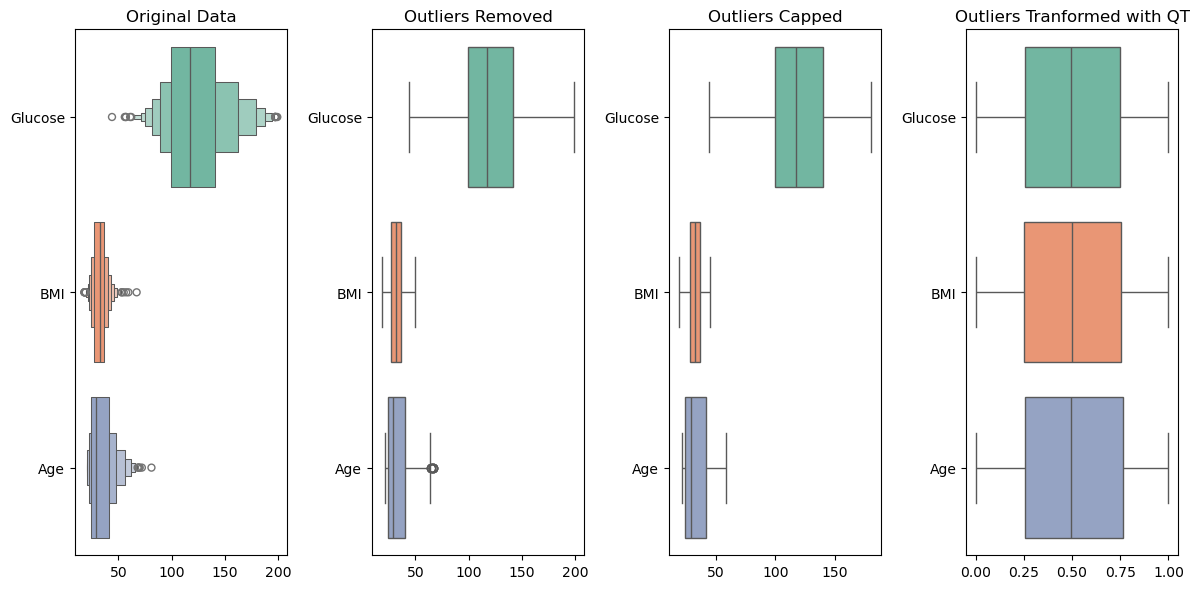

In [35]:
plt.figure(figsize=(12, 6))


plt.subplot(1,4,1)
sns.boxenplot(dataCopy_selected[columns_to_transform], orient='h', palette='Set2')
plt.title('Original Data')

plt.subplot(1,4,2)
sns.boxplot(data_no_outliers[columns_to_transform], orient='h', palette='Set2')
plt.title('Outliers Removed')

plt.subplot(1,4,3)
sns.boxplot(data_capped[columns_to_transform], orient='h', palette='Set2')
plt.title('Outliers Capped')

plt.subplot(1,4,4)
sns.boxplot(data_transformed[columns_to_transform], orient='h', palette='Set2')
plt.title('Outliers Tranformed with QT')

plt.tight_layout()
plt.show()

# Normalise the Data

In [36]:
# Min-Max Scaling
data_minmax = data_capped.copy()
features_to_scale = ['Glucose', 'BMI', 'Age']

#Initialise the MinMaxScaler
scaler = MinMaxScaler()

data_minmax[features_to_scale] = scaler.fit_transform(data_minmax[features_to_scale])

In [37]:
# Standard Scaling
data_standard = data_capped.copy()

# Initialise the StandardScaler 
scaler = StandardScaler()

data_standard[features_to_scale] = scaler.fit_transform(data_standard[features_to_scale])


In [38]:
print('MinMax Scaled Data:')
print(data_minmax.head())
print('\nStandard Scale Data:')
print(data_standard.head())

MinMax Scaled Data:
    Glucose       BMI       Age  Outcome
0  0.759124  0.587898  0.783784      1.0
1  0.299270  0.320672  0.270270      0.0
2  1.000000  0.194694  0.297297      1.0
3  0.328467  0.377935  0.000000      0.0
4  0.678832  0.950563  0.324324      1.0

Standard Scale Data:
    Glucose       BMI       Age  Outcome
0  0.909360  0.213543  1.549874      1.0
1 -1.231313 -0.890526 -0.177443      0.0
2  2.030664 -1.411016 -0.086532      1.0
3 -1.095397 -0.653940 -1.086557      0.0
4  0.535591  1.711922  0.004380      1.0


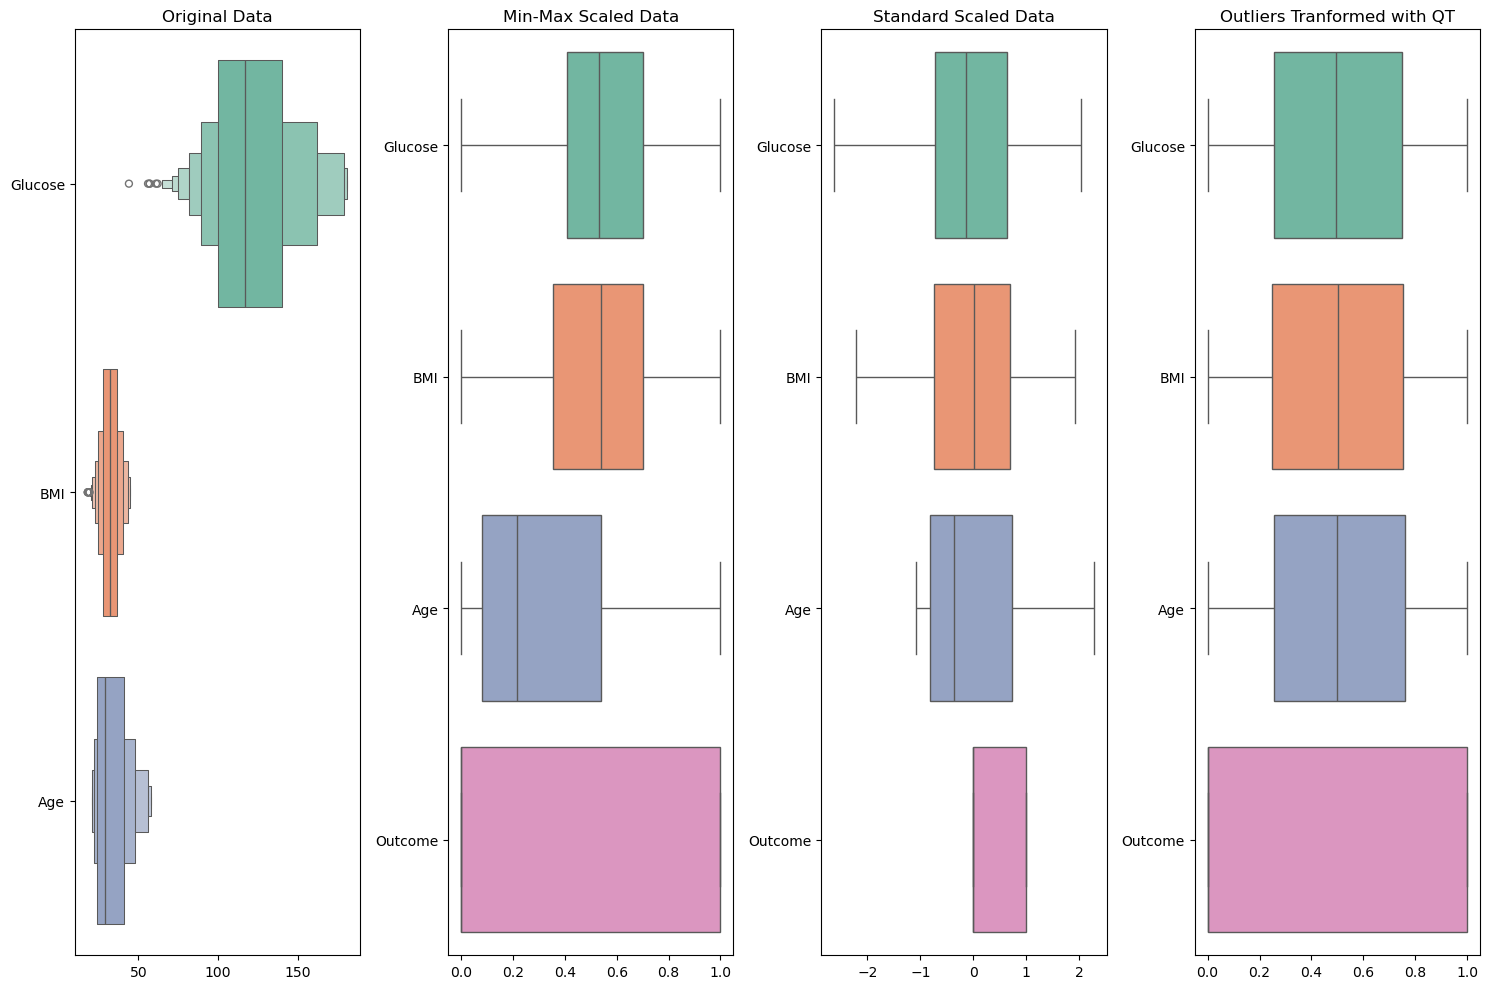

In [39]:
plt.figure(figsize=(15,10))

#Original Data
plt.subplot(1,4,1)
sns.boxenplot(data = data_capped[features_to_scale], orient='h', palette='Set2')
plt.title('Original Data')

#Min-Max Scaled Data
plt.subplot(1,4,2)
sns.boxplot(data_minmax, orient='h', palette='Set2')
plt.title('Min-Max Scaled Data')

#Standard Scaled Data
plt.subplot(1,4,3)
sns.boxplot(data_standard, orient='h', palette='Set2')
plt.title('Standard Scaled Data')

plt.subplot(1,4,4)
sns.boxplot(data_transformed, orient='h', palette='Set2')
plt.title('Outliers Tranformed with QT')

plt.tight_layout()
plt.show()

# Model Building

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, auc

# Select features and target variable
X = data_standard[['Glucose', 'BMI', 'Age']]
y = data_standard['Outcome']

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((614, 3), (614,))

## Logistic Regression

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.7736156351791531
Test Accuracy: 0.7402597402597403


Model Evaluation